In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [113]:
ride_path= "/Users/chris/OneDrive/Documents/GitHub/Homework/Week5/ride_data.csv"
ride= pd.read_csv(ride_path,encoding='iso-8859-1', low_memory=False)
city_path='/Users/chris/OneDrive/Documents/GitHub/Homework/Week5/city_data.csv'
city=pd.read_csv(city_path,encoding='iso-8859-1',low_memory=False)

In [114]:
ride_count=pd.DataFrame(ride.groupby("city")["ride_id"].count())
ride_count.reset_index(inplace=True)
ride_count.columns=["city","Rides_count"]
ride_count.head()


,city,Rides_count
0,Alvarezhaven,31
1,Alyssaberg,26
2,Anitamouth,9
3,Antoniomouth,22
4,Aprilchester,19


In [115]:
ride_averagefare=pd.DataFrame(ride.groupby("city")["fare"].mean())
ride_averagefare.reset_index(inplace=True)
ride_averagefare.columns=["city","Average Fare"]
ride_averagefare.head()

,city,Average Fare
0,Alvarezhaven,23.928710
1,Alyssaberg,20.609615
2,Anitamouth,37.315556
3,Antoniomouth,23.625000
4,Aprilchester,21.981579


In [116]:
data_pre=pd.merge(ride_count,ride_averagefare, on ="city")
data_pre.columns=["city","Rides_count","Average Fare"]
data_pre.head()

,city,Rides_count,Average Fare
0,Alvarezhaven,31,23.928710
1,Alyssaberg,26,20.609615
2,Anitamouth,9,37.315556
3,Antoniomouth,22,23.625000
4,Aprilchester,19,21.981579


In [117]:
data=pd.merge(data_pre,city, on ="city")
data.columns=["city","Rides_count","Average Fare","driver_count","type"]
data.head(200)

,city,Rides_count,Average Fare,driver_count,type
0,Alvarezhaven,31,23.928710,21,Urban
1,Alyssaberg,26,20.609615,67,Urban
2,Anitamouth,9,37.315556,16,Suburban
3,Antoniomouth,22,23.625000,21,Urban
4,Aprilchester,19,21.981579,49,Urban
5,Arnoldview,31,25.106452,41,Urban
6,Campbellport,15,33.711333,26,Suburban
7,Carrollbury,10,36.606000,4,Suburban
8,Carrollfort,29,25.395517,55,Urban
9,Clarkstad,12,31.051667,21,Suburban


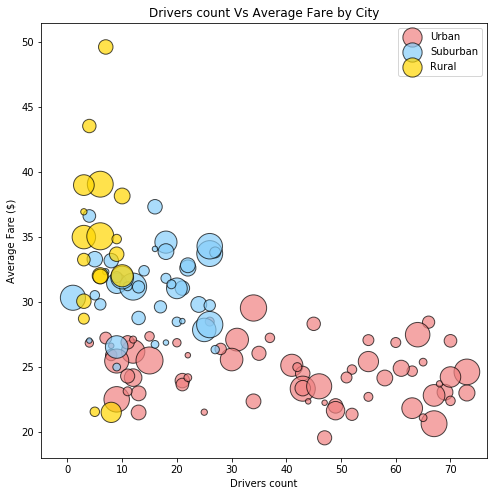

In [118]:
plt.figure(figsize=(8,8))
plt.scatter(data['driver_count'][data['type'] == "Urban"], data['Average Fare'][data['type'] == "Urban"], color='lightcoral', alpha=0.7,
            edgecolors='black', s = 10*data['driver_count'],label='Urban')
plt.scatter(data['driver_count'][data['type'] == "Suburban"], data['Average Fare'][data['type'] == "Suburban"], color='lightskyblue',
            alpha=0.7, s = 10*data['driver_count'],edgecolors='black', label='Suburban')
plt.scatter(data['driver_count'][data['type'] == "Rural"], data['Average Fare'][data['type'] == "Rural"], color='gold',alpha=0.7,
            s = 10*data['driver_count'],edgecolors='black',label='Rural')

plt.legend(loc="best")
plt.title('Drivers count Vs Average Fare by City')
plt.xlabel('Drivers count')
plt.ylabel('Average Fare ($)')

plt.show()

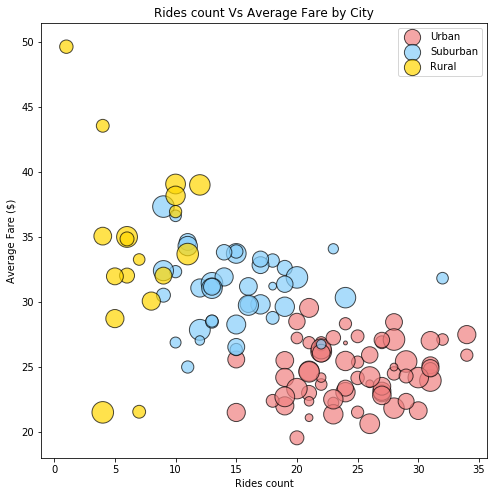

In [119]:
plt.figure(figsize=(8,8))
plt.scatter(data['Rides_count'][data['type'] == "Urban"], data['Average Fare'][data['type'] == "Urban"], color='lightcoral', alpha=0.7,
            edgecolors='black', s = 15*data['Rides_count'],label='Urban')
plt.scatter(data['Rides_count'][data['type'] == "Suburban"], data['Average Fare'][data['type'] == "Suburban"], color='lightskyblue',
            alpha=0.7, s = 15*data['Rides_count'],edgecolors='black', label='Suburban')
plt.scatter(data['Rides_count'][data['type'] == "Rural"], data['Average Fare'][data['type'] == "Rural"], color='gold',alpha=0.7,
            s = 15*data['Rides_count'],edgecolors='black',label='Rural')

plt.legend(loc="best")
plt.title('Rides count Vs Average Fare by City')
plt.xlabel('Rides count')
plt.ylabel('Average Fare ($)')

plt.show()


In [120]:
#Total Rides
total_rides_pie=data.groupby("type")["Rides_count"].sum()
total_rides_pie.head()

type
Rural        125
Suburban     625
Urban       1625
Name: Rides_count, dtype: int64

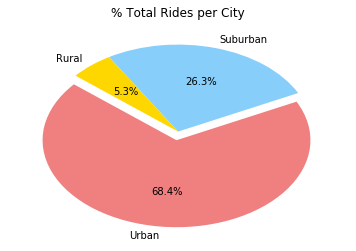

In [121]:
city_type=["Urban","Suburban","Rural"]
total_rides=[1625,625,125]
colors=["lightcoral","lightskyblue","gold"]
explode=[0.1,0,0]
plt.pie(total_rides, explode=explode, labels=city_type, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=140)
plt.title("% Total Rides per City")
plt.show()

In [122]:
#Total Drivers
total_drivers_pie=data.groupby("type")["driver_count"].sum()
total_drivers_pie.head()


type
Rural        104
Suburban     638
Urban       2607
Name: driver_count, dtype: int64

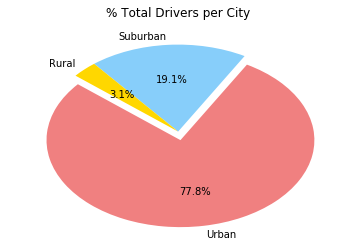

In [123]:
city_type=["Urban","Suburban","Rural"]
total_drivers=[2607,638,104]
colors=["lightcoral","lightskyblue","gold"]
explode=[0.1,0,0]
plt.pie(total_drivers, explode=explode, labels=city_type, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=140)
plt.title("% Total Drivers per City")
plt.show()

In [127]:
#Total Fare
fare=pd.DataFrame(ride.groupby("city")["fare"].sum())
fare.reset_index(inplace=True)
fare.columns=["city","Total Fare"]
fare_city=pd.merge(data,fare, on = "city")
fare_city.head()

,city,Rides_count,Average Fare,driver_count,type,Total Fare
0,Alvarezhaven,31,23.928710,21,Urban,741.79
1,Alyssaberg,26,20.609615,67,Urban,535.85
2,Anitamouth,9,37.315556,16,Suburban,335.84
3,Antoniomouth,22,23.625000,21,Urban,519.75
4,Aprilchester,19,21.981579,49,Urban,417.65


In [132]:
total_fare_pie=fare_city.groupby("type")["Total Fare"].sum()
total_fare_pie.head()

type
Rural        4255.09
Suburban    19317.88
Urban       40078.34
Name: Total Fare, dtype: float64

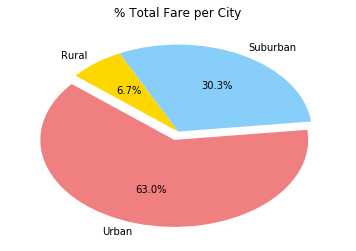

In [133]:
city_type=["Urban","Suburban","Rural"]
total_fare=[40078.34,19317.88,4255.09]
colors=["lightcoral","lightskyblue","gold"]
explode=[0.1,0,0]
plt.pie(total_fare, explode=explode, labels=city_type, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=140)
plt.title("% Total Fare per City")
plt.show()

In [ ]:
#Urban areas have the highest rides count which led to hiring more driver and have higher fare in urban areas compared to suburban and rural.
#Port James is considered a suburban area but it has the highest total fare looking at cities level.
#needs to look at geography before taking a decision of expanding the business.